# $N_2$ Saturation Diagrams

*Alexander Osorio C., 2025*

## Setup

### Installing PYroMat

In [1]:
# !pip install pyromat

### Importing packages

In [2]:
import pyromat as pyro
import numpy   as np
import seaborn as sns
import pandas  as pd
import matplotlib.pyplot as plt

In [3]:
# Uses seaborn to update matplotlib's run commands (rc) parameters to improve aesthetics

sns.set_theme(context='notebook',
              style='darkgrid',
              palette='deep',
              font='sans-serif',
              font_scale=1.2,
              color_codes=True,
              rc=None)

### Using SI units in PYroMat

In [4]:
pyro.config["unit_pressure"] = "kPa"
pyro.config["unit_energy"]   = "kJ"
pyro.config["unit_matter"]   = "kg"

## Retrieving data from multi-phase $N_2$

In [5]:
N2 = pyro.get('mp.N2')

### Triple point properties of $N_2$

In [6]:
Tt, Pt = N2.triple()

print(f'Triple Point Temperature: {Tt:.2f} K')
print(f'   Triple Point Pressure: {Pt:.5f} kPa')

Triple Point Temperature: 63.15 K
   Triple Point Pressure: 12.52300 kPa


### Critical point properties of $N_2$

In [7]:
Tc, Pc = N2.critical()

print(f'Critical Point Temperature: {Tc:.2f} K')
print(f'   Critical Point Pressure: {Pc:.0f} kPa')

Critical Point Temperature: 126.19 K
   Critical Point Pressure: 3396 kPa


## Equilibrium states of the two-phase mixture

### Temperature interval of the saturation region

In [8]:
# Temperature vector spanning (Tt, Tc) with a 0.5 K step (avoid including the exact endpoints)
T = np.arange(Tt + 1e-3, Tc - 1e-3, 0.5) # K

print(f"T grid: {T[0]:.2f} K to {T[-1]:.2f} K; n = {T.size} points")

T grid: 63.15 K to 126.15 K; n = 127 points


### Saturation pressures

In [9]:
psat = N2.ps(T=T) # k

### Saturated liquid and vapor specific volumes

In [10]:
vf, vg = N2.vs(T=T)  # m³/kg

### Saturated liquid and vapor specific entropies

In [11]:
sf, sg = N2.ss(T=T) # kJ/(kg·K)

### Saturation properties

In [12]:
# Create a DataFrame for the saturation properties
sat_N2 = pd.DataFrame({
    "Tsat (K)": T,
    "Psat (kPa)": psat,
    "v𝑓 (m³/kg)": vf,
    "v𝑔 (m³/kg)": vg,
    "s𝑓 (kJ/kg·K)": sf,
    "s𝑔 (kJ/kg·K)": sg,
})

# Peek
sat_N2.head(11)

,Tsat (K),Psat (kPa),v𝑓 (m³/kg),v𝑔 (m³/kg),s𝑓 (kJ/kg·K),s𝑔 (kJ/kg·K)
0,63.152,12.524037,0.001153,1.482499,2.425713,5.838194
1,63.652,13.719570,0.001156,1.363150,2.441465,5.818948
2,64.152,15.005565,0.001159,1.255263,2.457102,5.800087
3,64.652,16.386921,0.001161,1.157578,2.472626,5.781599
4,65.152,17.868677,0.001164,1.068990,2.488038,5.763472
5,65.652,19.456010,0.001167,0.988526,2.503341,5.745698
6,66.152,21.154236,0.001170,0.915332,2.518536,5.728265
7,66.652,22.968807,0.001173,0.848651,2.533625,5.711163
8,67.152,24.905305,0.001176,0.787818,2.548609,5.694383
9,67.652,26.969448,0.001179,0.732241,2.563490,5.677915


## *P - T* diagram

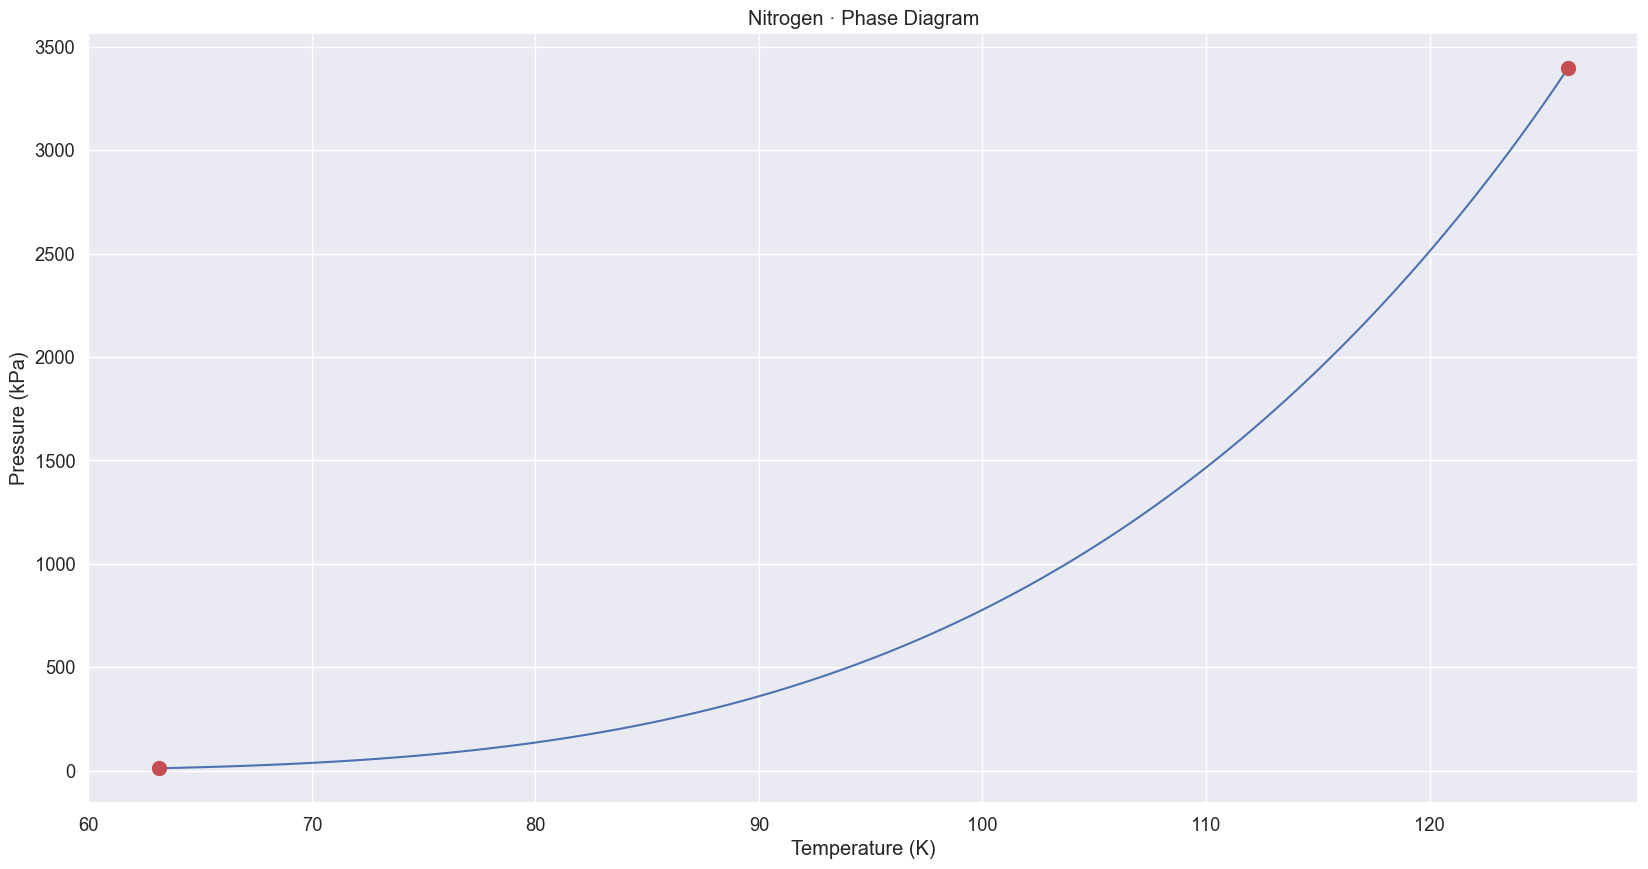

In [13]:
fig, ax = plt.subplots(figsize=(20,10))

# title
ax.set_title('Nitrogen · Phase Diagram')

# saturation diagram
ax.plot(T, psat, 'b')

# labels for phases (positions adjusted manually)
#ax.text(-165, 2000, 'Liquid', size=24)
#ax.text(-154, 1800, 'Vapor', size=24)

# triple point
ax.plot(Tt, Pt, 'ro', markersize=10) # state marker
#ax.text(-210, -120, r'Triple point: -210 $\mathrm{^oC}$, 12.5 $\mathrm{kPa}$', size=16)

# critical point
ax.plot(Tc, Pc, 'ro', markersize=10) # state marker
#ax.text(-162, 3400, r'Critical point: -147 $\mathrm{^oC}$, 3396 $\mathrm{kPa}$', size=16)

#axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel('Temperature (K)')

plt.show()

## *P - $\upsilon$* diagram

### Semi-logarithmic graph

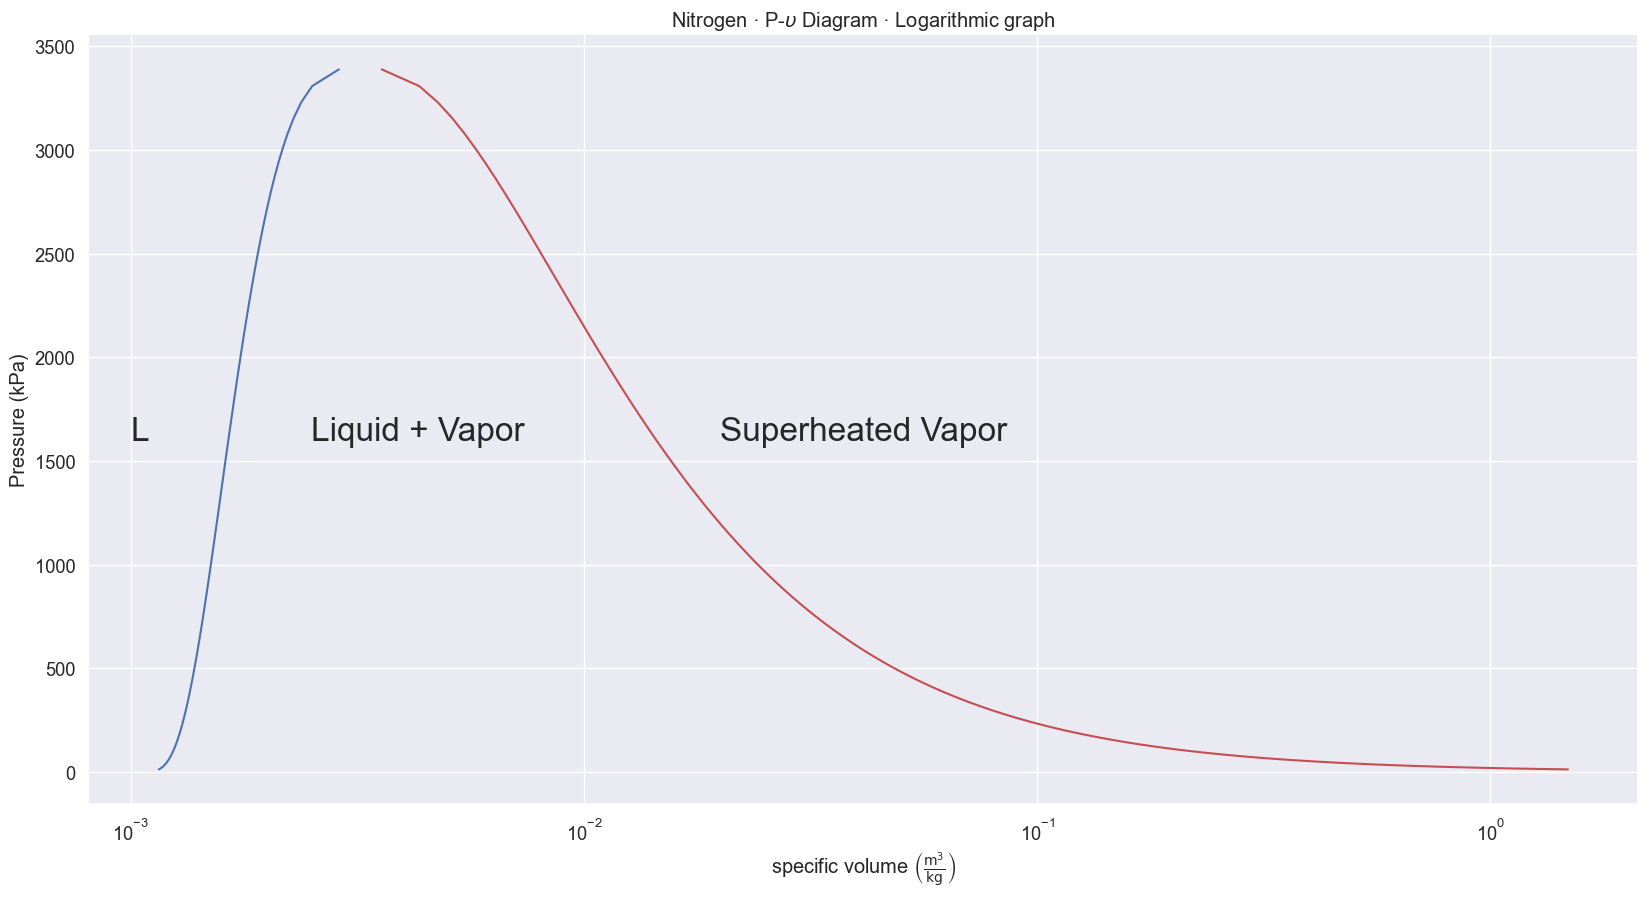

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

# title
ax.set_title(r'Nitrogen · P-$\upsilon$ Diagram · Logarithmic graph')

# creation of the log scale
ax.set_xscale("log")

# saturation diagram
ax.plot(vf, psat, 'b')
ax.plot(vg, psat, 'r')

#l iquid phase label
ax.text(0.001, 1600, 'L', size=24)

#liquid+vapor phase label
ax.text(0.0025, 1600, 'Liquid + Vapor', size=24)

#superheated vapor phase label
ax.text(0.02, 1600, 'Superheated Vapor', size=24)

#axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel(r'specific volume $\left( \mathrm{\frac{m^3}{kg}} \right)$')

plt.show()

### Semi-logarithmic graph (grids)

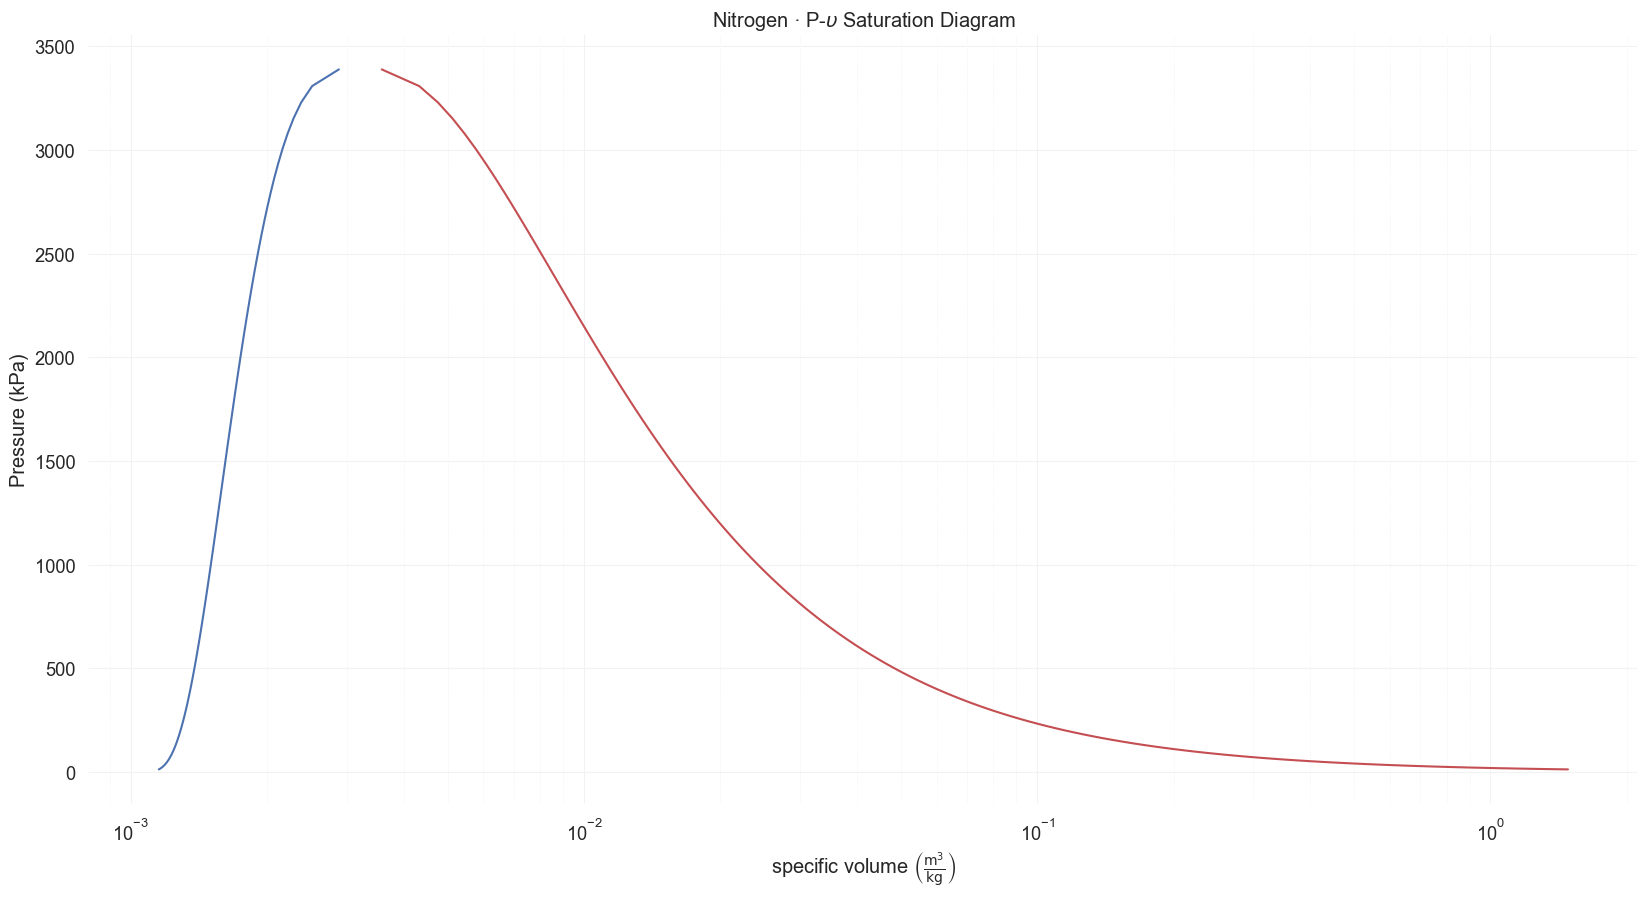

In [15]:
fig, ax = plt.subplots(figsize=(20,10), facecolor='white')  # figure bg
ax.set_facecolor('white')                                   # axes bg
ax.set_axisbelow(True)                                      # grid behind curves

# log scale
ax.set_xscale("log")

# subtle grid
ax.grid(which='major', color='0.95', linewidth=0.8)
ax.grid(which='minor', color='0.95', linewidth=0.7, linestyle=':')

# title
ax.set_title(r'Nitrogen · P-$\upsilon$ Saturation Diagram')

# curves
ax.plot(vf, psat, 'b', zorder=3)
ax.plot(vg, psat, 'r', zorder=3)

# labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel(r'specific volume $\left( \mathrm{\frac{m^3}{kg}} \right)$')

plt.show()

### Graph in normal scale

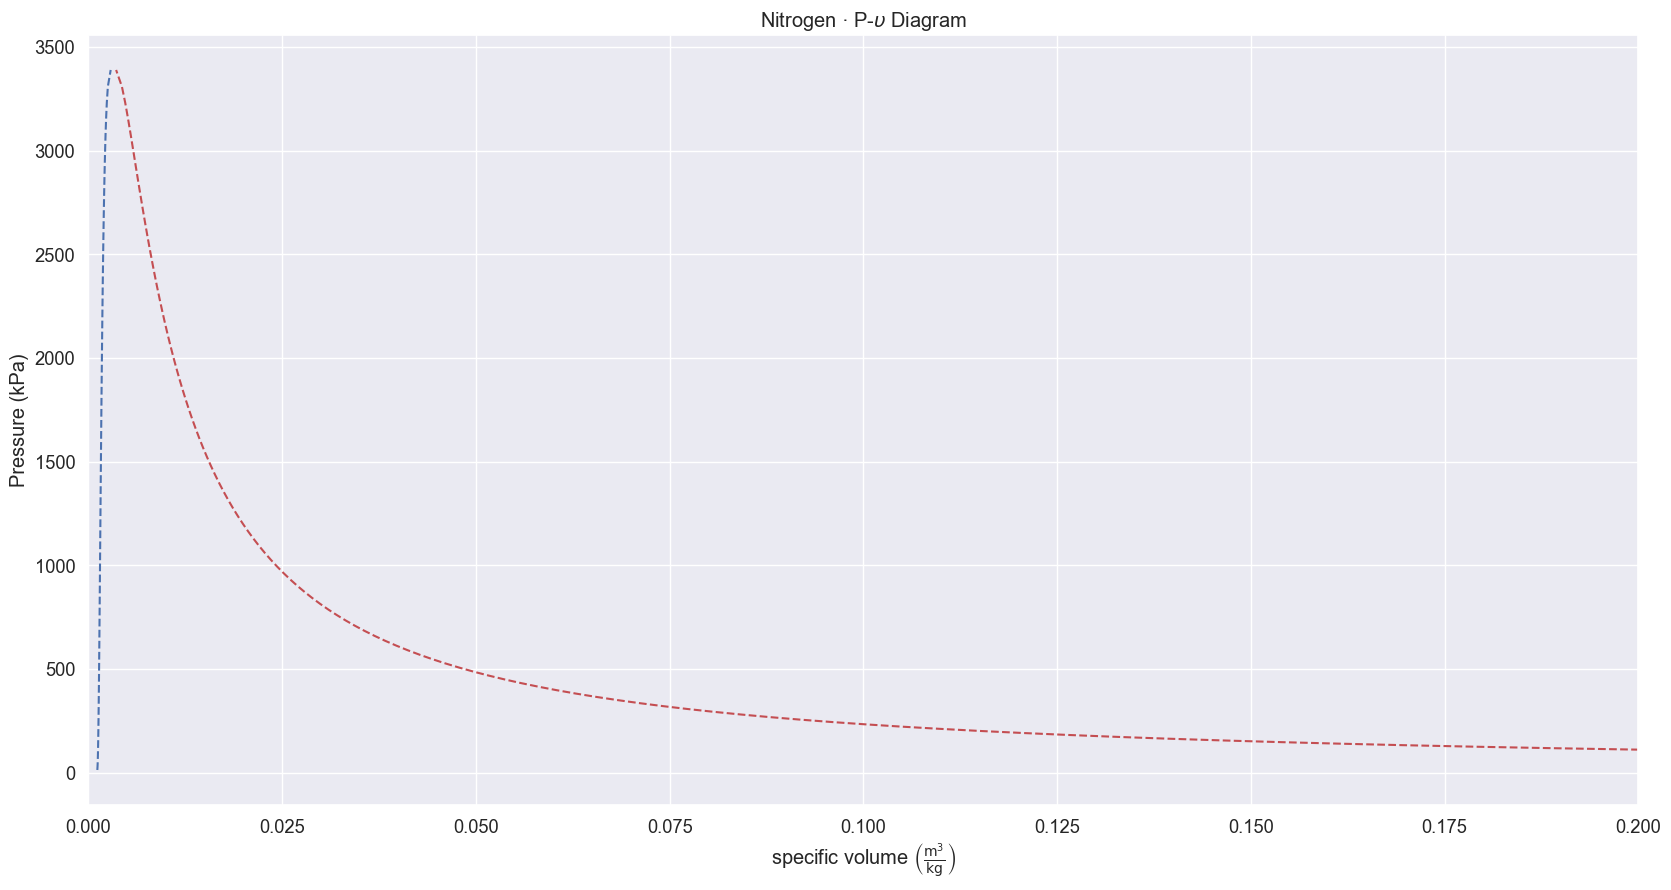

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))

# title
ax.set_title(r'Nitrogen · P-$\upsilon$ Diagram')

# axis limits
plt.xlim(0, 0.2)

# saturation diagram
ax.plot(vf, psat, 'b--')
ax.plot(vg, psat, 'r--')

# axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel(r'specific volume $\left( \mathrm{\frac{m^3}{kg}} \right)$')

plt.show()

## *T - $\upsilon$* diagram

### Semi-logarithmic graph

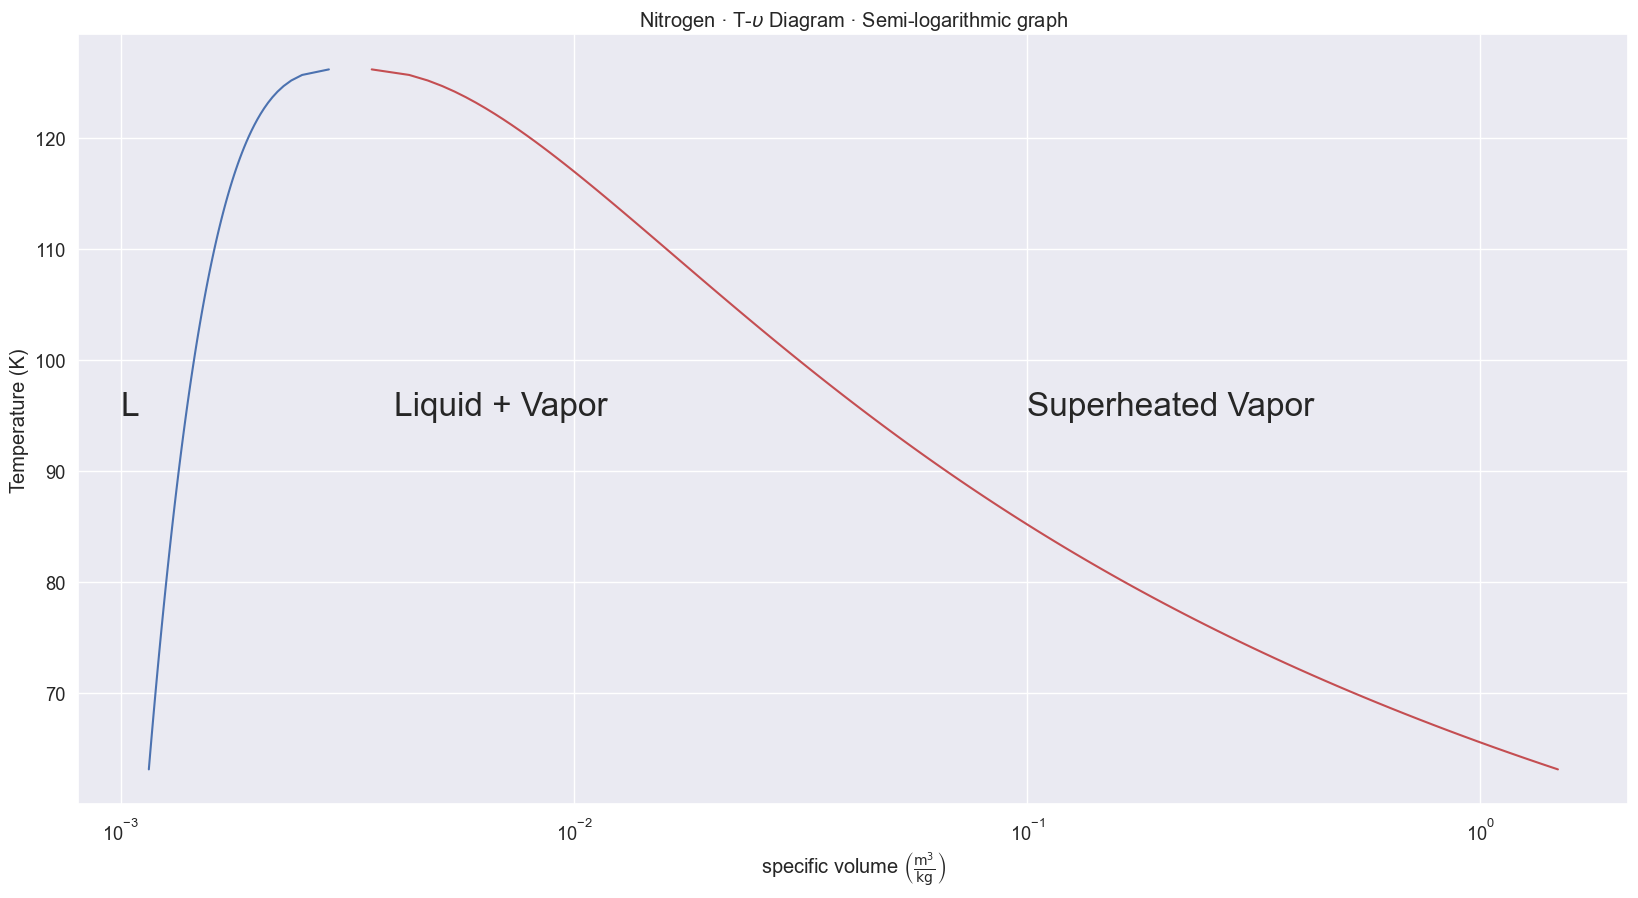

In [17]:
fig, ax = plt.subplots(figsize=(20,10))

# title
ax.set_title(r'Nitrogen · T-$\upsilon$ Diagram · Semi-logarithmic graph')

# creation of the log scale
ax.set_xscale("log")

# saturation diagram
ax.plot(vf, T, 'b')
ax.plot(vg, T, 'r')

# liquid phase label
ax.text(0.001, 95, 'L', size=24)

# liquid+vapor phase label
ax.text(0.004, 95, 'Liquid + Vapor', size=24)

# superheated vapor phase label
ax.text(0.1, 95, 'Superheated Vapor', size=24)

# axis labels
ax.set_ylabel('Temperature (K)')
ax.set_xlabel(r'specific volume $\left( \mathrm{\frac{m^3}{kg}} \right)$')

plt.show()

### Graph in normal scale

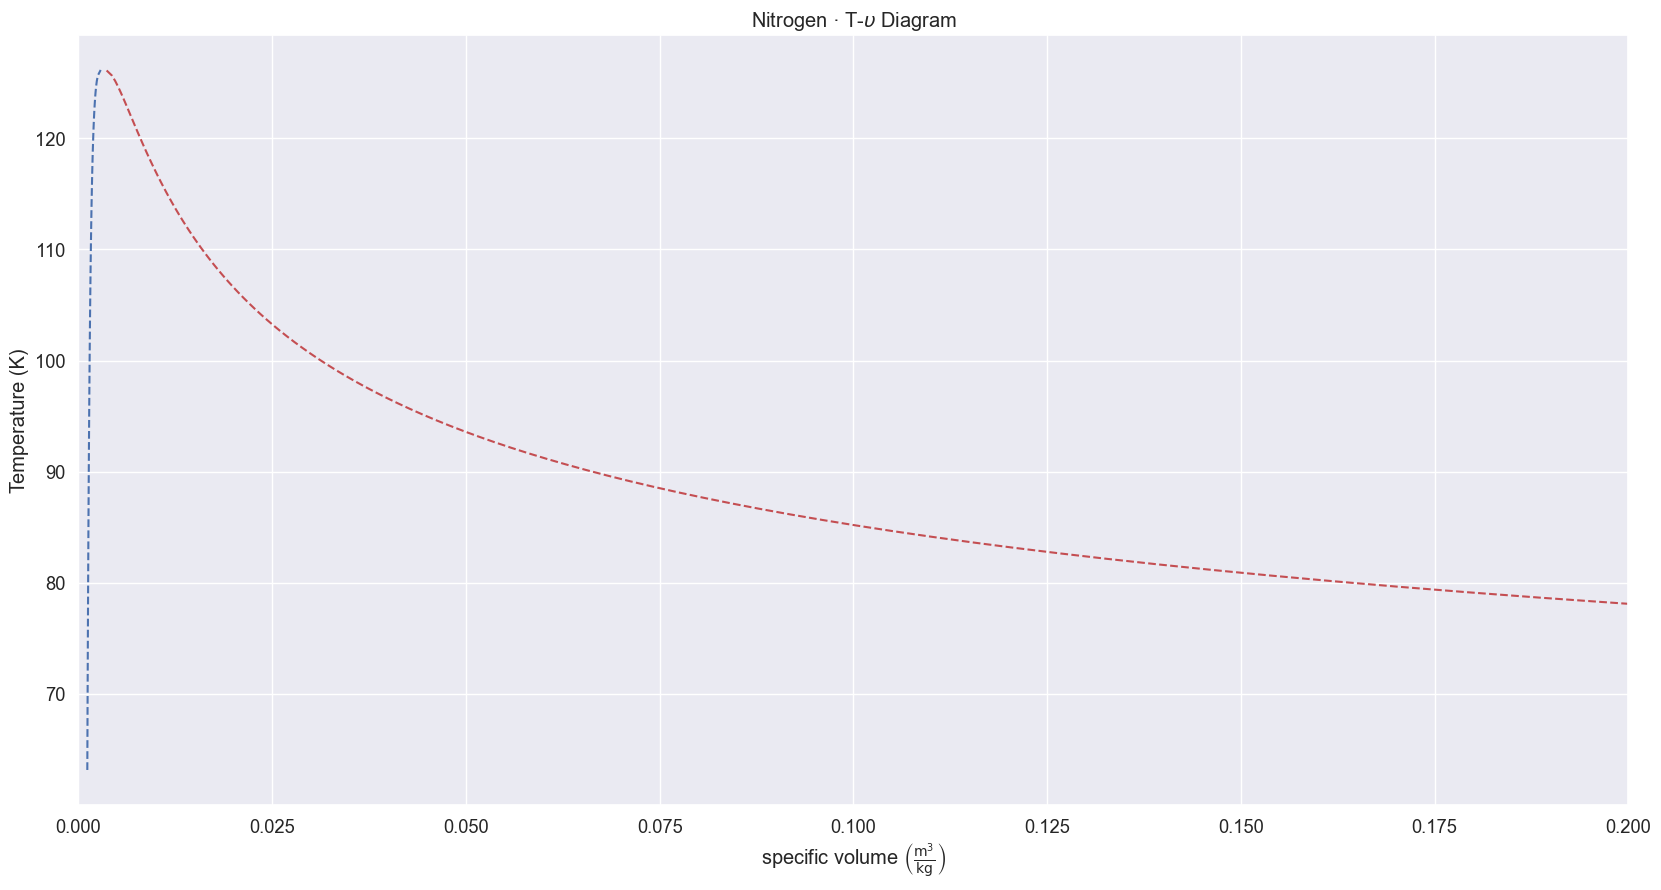

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))

# title
ax.set_title(r'Nitrogen · T-$\upsilon$ Diagram')

# axis limits
ax.set_xlim([0,0.2])

# saturation diagram
ax.plot(vf, T, 'b--')
ax.plot(vg, T, 'r--')

# axis labels
ax.set_ylabel('Temperature (K)')
ax.set_xlabel(r'specific volume $\left( \mathrm{\frac{m^3}{kg}} \right)$')

plt.show()

## *T - s* diagram

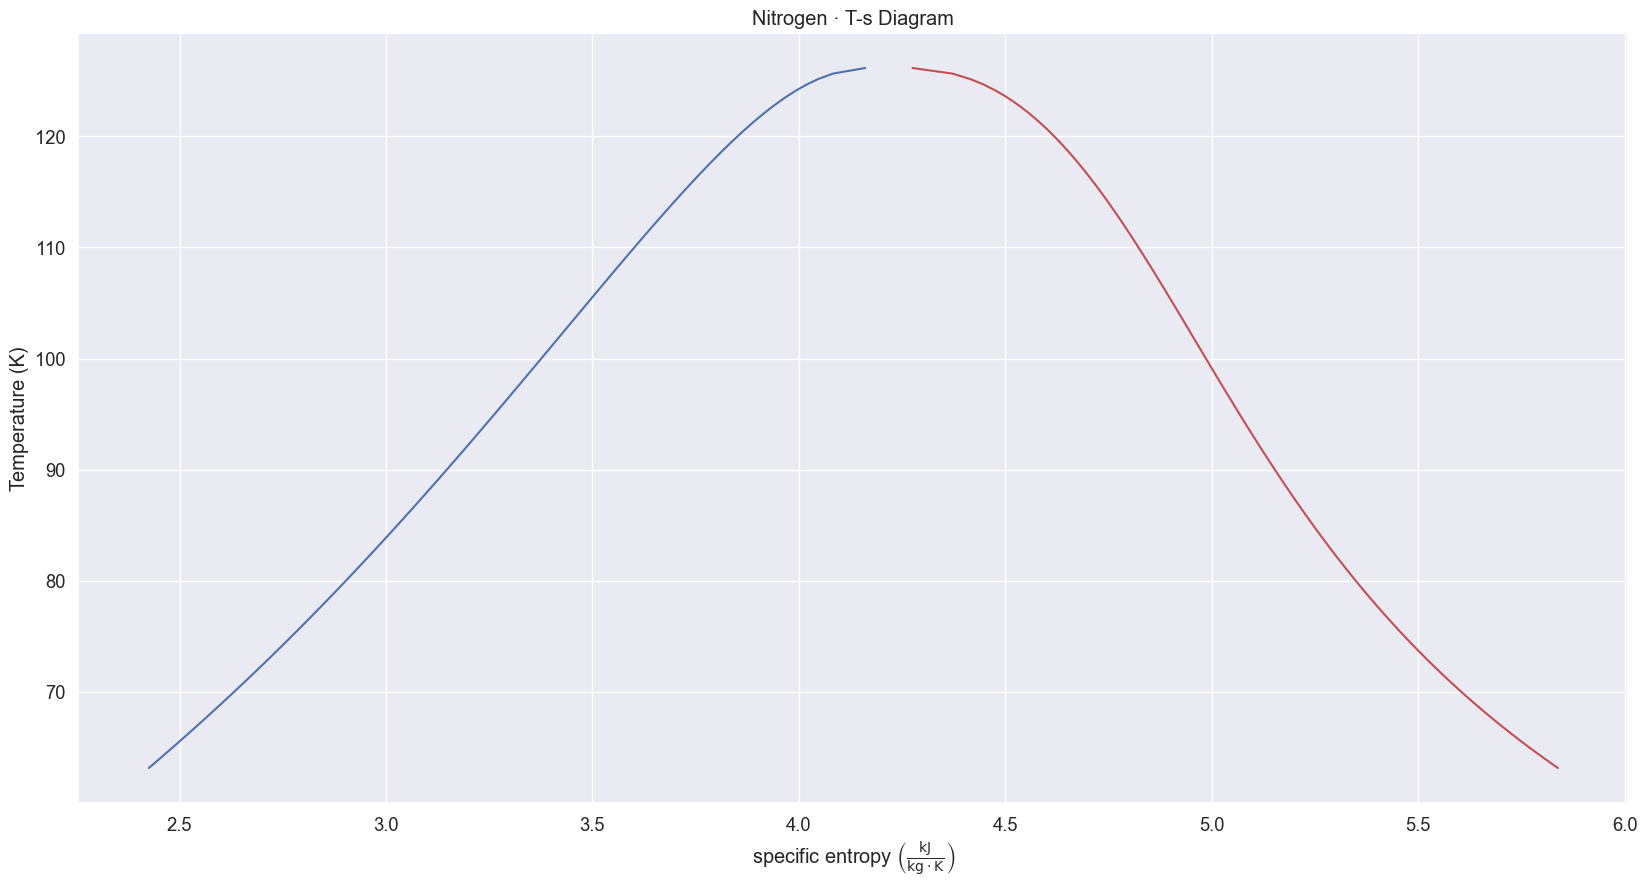

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))

# title
ax.set_title('Nitrogen · T-s Diagram')

# saturation diagram
ax.plot(sf, T, 'b')
ax.plot(sg, T, 'r')

# axis labels
ax.set_ylabel('Temperature (K)')
ax.set_xlabel(r'specific entropy $\left( \mathrm{\frac{kJ}{kg \cdot K}} \right)$')

plt.show()